# 1.Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [100]:
# This ios added only to ignore warning for this excercise purpose.
# We know the significance of warning functionlity
import warnings
warnings.filterwarnings('ignore')

In [101]:
import pandas as pd
import openpyxl as op

xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_kayaking = pd.read_excel(xls, 'Kayaking')
df_fencing = pd.read_excel(xls, 'Fencing')
df_triathlon = pd.read_excel(xls, 'Triathlon')

combined_sport_data = pd.concat([df_kayaking, df_fencing, df_triathlon])
combined_sport_data.head()

combined_sport_data.to_excel('combined_sports_data.xlsx', index=False)

# 2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

Analysis :

As per our initial analysis, we were able to label the rows only for Warm Up and GET. There were no records found for category "Cool down" and also there was no definition given in the spreadsheet for "Cool down". 

So, we read through the PhysioNet link.  As per the web page, the GET phase is determined based on the incremental increase of Power. So, we decided that "Power" can be one of the factor to find out "Cool down" phase.  So, we have rows with "Power 0" and time > 0 as Cool down records. 

Content From the PhysioNet link:
GET protocol corresponds to warm-up period of 3 min at 50 watts, followed by an incremental increase of power (15 Watts/min) until exhaustion. At exercise cessation, athletes stayed sat on the cycloergometer to record the cardiorespiratory parameters during their recovery

In [102]:
import pandas as pd

#define path
combined_data = 'combined_sports_data.xlsx'
#read excel file
df_comb_data = pd.read_excel(combined_data)

#define 'label' column
df_comb_data['Label'] = ''

#divide rows into three parts
df_comb_data.loc[df_comb_data['time'] < 0 , "Label"] = 'Warm Up'
df_comb_data.loc[(df_comb_data['time'] >= 0) & (df_comb_data['power'] > 0), "Label"] = 'GET'
df_comb_data.loc[(df_comb_data['time'] > 0) & (df_comb_data['power'] == 0), "Label"] = 'Cool down'
print(df_comb_data.head)

#write output to excel
df_comb_data.to_excel('labeled_combined_sports_data.xlsx', index=False)


<bound method NDFrame.head of        ID     time     RR       VO2  power      Label
0      11 -168.600  727.0  0.287147      0    Warm Up
1      11 -167.872  728.0  0.287147      0    Warm Up
2      11 -167.148  724.0  0.287147      0    Warm Up
3      11 -166.484  664.0  0.320580      0    Warm Up
4      11 -165.836  648.0  0.320580      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool down
52058  18  947.816  528.0  0.507071      0  Cool down
52059  18  948.344  528.0  0.507071      0  Cool down
52060  18  948.884  540.0  0.507071      0  Cool down
52061  18  949.424  540.0  0.507071      0  Cool down

[52062 rows x 6 columns]>


# 3.What was the average time each tested lasted excluding warm up for all athletes?

In [103]:
import pandas as pd

#to read file

df = pd.read_excel('labeled_combined_sports_data.xlsx')
#to remove warm up rows

my_df = df[df['Label'] != 'Warm Up']


average_time_per_category = my_df.groupby('Label')['time'].mean().reset_index()
# Rename the column for clarity
average_time_per_category.rename(columns={'time': 'average_time'}, inplace=True)


print(average_time_per_category)

       Label  average_time
0  Cool down    993.988405
1        GET    512.492916


# 4.Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [104]:
import pandas as pd

# Read the data from different sheets
df1 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Kayaking')
df3 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Triathlon')
df4 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Fencing')

# Add a 'sport' column to identify the source sheet
df1['sport'] = 'Kayaking'
df3['sport'] = 'Triathlon'
df4['sport'] = 'Fencing'

# Concatenate the DataFrames
df_combined = pd.concat([df1, df3, df4])

# Sorting by athlete (ID) and time for consecutive RR calculation
df_combined.sort_values(by=['ID', 'time'], inplace=True)

# Calculate the difference between consecutive RR 
df_combined['RR_diff'] = df_combined.groupby('ID')['RR'].diff()

# Group by athlete (ID) and calculate the standard deviation of RR intervals (HRV indicator)
df_combined['HRV'] = df_combined.groupby('ID')['RR'].transform('std')

# Group by 'sport' and calculate the average HRV
avg_hrv_by_sport = df_combined.groupby('sport')['HRV'].mean().reset_index()

# Sorting by highest average HRV
highest_avg_hrv_sport = avg_hrv_by_sport.sort_values(by='HRV', ascending=False)

# Display the sport with the highest average HRV
print(highest_avg_hrv_sport)

# Display the sport with the highest average HRV (Top Sport)
print("Sport with highest average HRV:", highest_avg_hrv_sport.iloc[0]['sport'])

       sport         HRV
1   Kayaking  186.645048
0    Fencing  167.218780
2  Triathlon  137.353650
Sport with highest average HRV: Kayaking


# 5.What was the average time each test lasted (including warm up) for all athletes?


In [105]:
#to read excel file
df1=pd.read_excel('labeled_combined_sports_data.xlsx')
df1
#calculate average time of each test including warm up

average_time_per_category = df.groupby('Label')['time'].mean().reset_index()
print(average_time_per_category)

       Label        time
0  Cool down  993.988405
1        GET  512.492916
2    Warm Up  -90.058246


# 6.What was the most common wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports.

In [106]:
import pandas as pd

# to read file
my_df = pd.read_excel('combined_sports_data.xlsx')


#  filter out any rows where power is zero or negative 
positive_w_df = my_df[my_df['power'] > 0]

#calculate most common wattage
most_common_wattage = positive_w_df['power'].mode()[0]

# Next, we'll gather all the rows where participants hit that exact common wattage
most_common_wattage_df = positive_w_df[positive_w_df['power'] == most_common_wattage]

# Let's calculate how long (on average) participants stayed at this popular wattage
average_time_at_common_wattage = most_common_wattage_df['time'].mean()


print(f"Looks like the wattage most athletes hit during their sessions was {most_common_wattage:.2f} watts!")
print(f"And on average, they stayed at that wattage for about {average_time_at_common_wattage:.2f} seconds.")


Looks like the wattage most athletes hit during their sessions was 50.00 watts!
And on average, they stayed at that wattage for about 92.24 seconds.


# 7.Create a correlation matrix to show the relationship between HR, BMI and sport.

In [107]:
import pandas as pd

# Read the Excel files
df = pd.read_excel('combined_sports_data.xlsx')
df1 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Select relevant columns from both datasets
df2 = df1[['Height', 'Weight', 'ID', 'sport']]
df3 = df[['RR', 'ID']]

# Merge the datasets on the 'ID' column
df_combined = pd.merge(df2, df3, on='ID')

# Adding the BMI column 
df_combined['BMI'] = df_combined['Weight'] / (df_combined['Height'] / 100) ** 2

# Calculate the heart rate (HR) using the formula: HR = 60 / (RR / 1000)
df_combined['HR'] = 60 / (df_combined['RR'] / 1000)

#  convert 'sport' column' it into numerical data without dropping any categories
df_combined_encoded = pd.get_dummies(df_combined, columns=['sport'], drop_first=False)

# Check for the unique sports 
print(df_combined['sport'].unique())

# Select relevant columns for correlation
columns_of_interest = ['HR', 'BMI'] + [col for col in df_combined_encoded.columns if col.startswith('sport_')]

# Create a correlation matrix
correlation_matrix = df_combined_encoded[columns_of_interest].corr()

# Display the correlation matrix
print(correlation_matrix)

['fencing' 'kayak' 'triathlon']
                       HR       BMI  sport_fencing  sport_kayak  \
HR               1.000000 -0.056931       0.039244    -0.035366   
BMI             -0.056931  1.000000      -0.146282     0.520170   
sport_fencing    0.039244 -0.146282       1.000000    -0.821351   
sport_kayak     -0.035366  0.520170      -0.821351     1.000000   
sport_triathlon -0.008735 -0.607531      -0.345537    -0.251481   

                 sport_triathlon  
HR                     -0.008735  
BMI                    -0.607531  
sport_fencing          -0.345537  
sport_kayak            -0.251481  
sport_triathlon         1.000000  


# 8.What are the names of the kayaking athletes?

In [108]:
import pandas as pd

# Read the Athletes Excel sheet
df1 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Filter for kayaking athletes (standardizing case and whitespace in 'sport' column)
kayaking_athletes = df1[df1['sport'].str.strip().str.lower() == 'kayak']

# Create a Full_Name column by concatenating First Name and Last Name
kayaking_athletes['Full_Name'] = kayaking_athletes['First Name'] + ' ' + kayaking_athletes['Last Name']

# Display the Full Names of the kayaking athletes
print(kayaking_athletes['Full_Name'])


10    Isabella Griffin
11         Caleb Dixon
12       Mia Carpenter
13     Harper Mitchell
14       Mason Wallace
15      Logan Anderson
Name: Full_Name, dtype: object


# 9.What was the average HRV of the triathletes?

In [109]:
import pandas as pd

# Load the datasets
df1 = pd.read_excel('labeled_combined_sports_data.xlsx')
df2 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Merge the datasets on the 'ID' column
merged_df = pd.merge(df1, df2[['ID', 'sport']], on='ID', how='inner')

# Filter the dataset for triathletes
triathletes = merged_df[merged_df['sport'].str.lower() == 'triathlon']

# Calculate the difference between consecutive RR intervals for each triathlete
triathletes['RR_diff'] = triathletes.groupby('ID')['RR'].diff()

# Calculate the standard deviation of the RR differences for each triathlete (this is HRV)
hrv_per_triathlete = triathletes.groupby('ID')['RR_diff'].std().reset_index()

# Rename the column for clarity
hrv_per_triathlete.columns = ['ID', 'HRV']

# Calculate the average HRV of all triathletes
average_hrv_triathletes = hrv_per_triathlete['HRV'].mean()

# Display the results
print(hrv_per_triathlete)
print(f"The average HRV of the triathletes is: {average_hrv_triathletes}")

   ID        HRV
0  17  28.081705
1  18  30.505849
The average HRV of the triathletes is: 29.293777318936115


# 10.How long was athlete 12 in HR Zone 5?

In [110]:
import pandas as pd

dataset = pd.read_excel("./resources/V02Max_Combined.xlsx")
Athletes = pd.read_excel("./resources/V02Max_Combined.xlsx", sheet_name='Athletes')
df_combined_data = pd.read_excel("combined_sports_data.xlsx")

df_merge_file = Athletes.merge(df_combined_data, on='ID', how='inner')

def calculate_hr(rr_interval):
    if pd.notna(rr_interval) and rr_interval > 0:
        return 60 / (rr_interval / 1000)
    else:
        return None

df_merge_file['HR'] = df_merge_file['RR'].apply(calculate_hr)

df_merge_file['Label'] = df_merge_file['HR'].apply(lambda hr: 'Zone 5' if hr > 155 else 'Other')

zone_5_data = df_merge_file[df_merge_file['Label'] == 'Zone 5']

if 'time' in zone_5_data.columns:
    total_time_zone_5 = zone_5_data.groupby('ID')['time'].sum().reset_index()
    total_time_zone_5.columns = ['ID', 'Total Time in Zone 5']

    average_time_zone_5 = total_time_zone_5['Total Time in Zone 5'].mean()
    
    print("Total time spent in Zone 5 athlete 12:")
    print(total_time_zone_5)

Total time spent in Zone 5 athlete 12:
    ID  Total Time in Zone 5
0    1            665863.684
1    2            337038.976
2    3           1003104.000
3    4           1392462.744
4    5           1327351.612
5    6            709450.484
6    7            434096.300
7    8            397918.448
8    9            794825.752
9   10            875252.900
10  11            742750.396
11  12           1406708.024
12  13           1439558.824
13  14            801810.092
14  15            779305.300
15  16            817997.360
16  17            315787.324
17  18            669512.272


# 11.Create any 3d plot using any data. Values do not have to be from the dataset given.

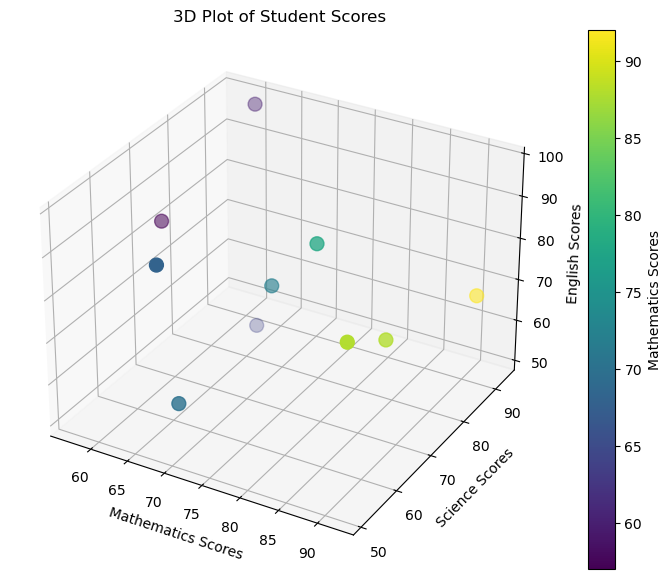

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for 10 students
np.random.seed(42)  # For reproducibility

students = [f"Student {i+1}" for i in range(10)]
math_scores = np.random.randint(50, 100, size=10)
science_scores = np.random.randint(50, 100, size=10)
english_scores = np.random.randint(50, 100, size=10)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(math_scores, science_scores, english_scores, c=math_scores, cmap='viridis', s=100)

# Labels and title
ax.set_xlabel('Mathematics Scores')
ax.set_ylabel('Science Scores')
ax.set_zlabel('English Scores')
ax.set_title('3D Plot of Student Scores')

# Add color bar for reference
fig.colorbar(scatter, ax=ax, label='Mathematics Scores')

# Show plot
plt.show()

# 12.What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [112]:
import pandas as pd

# Read the sports data
df = pd.read_excel('labeled_combined_sports_data.xlsx')

# Read the athlete data (names, sports, etc.)
df2 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Merge the datasets on the 'ID' column
merged_df = pd.merge(df, df2[['ID', 'sport', 'First Name', 'Last Name']], on='ID', how='inner')
# Combine first name and last name into a single column
merged_df['Full Name'] = merged_df['First Name'] + ' ' + merged_df['Last Name']

# Display the merged DataFrame
merged_df.head()

# Drop duplicates based on 'Full Name' to get unique athletes
unique_athletes = merged_df.drop_duplicates(subset=['Full Name'])
unique_athletes
# Sort the merged DataFrame by VO2 in descending order and get the top 3
top_3_athletes = unique_athletes.nlargest(3, 'VO2')
top_3_athletes


# Display the top 3 athletes with names, sports, and VO2 Max values
print(top_3_athletes[['First Name', 'Last Name', 'sport', 'VO2']])


      First Name  Last Name    sport       VO2
34612     Sophia  Rodriguez  fencing  0.626878
23881    Jackson     Harper  fencing  0.620532
31018        Ava   Thompson  fencing  0.591842


# 13.Calculate the year of birth of each athlete and store it as a column in the tables.

In [113]:
import pandas as pd
from datetime import datetime

# Read the sports data
df = pd.read_excel('labeled_combined_sports_data.xlsx')

# Read the athlete data (names, sports, etc.)
df2 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Calculate the current year
current_year = datetime.now().year

# Calculate the year of birth for each athlete
df2['Year of Birth'] = current_year - df2['age']

# Assuming athletes' birthdays have already occurred this year, calculate the approximate birthdate
df2['Approximate Birthdate'] = pd.to_datetime(df2['Year of Birth'].astype(str) + '-01-01')

# Merge the datasets on the 'ID' column
merged_df = pd.merge(df, df2[['ID', 'sport', 'First Name', 'Last Name', 'Approximate Birthdate']], on='ID', how='inner')

# Combine first name and last name into a single column
merged_df['Full Name'] = merged_df['First Name'] + ' ' + merged_df['Last Name']

# Display the complete DataFrame with names, sports, VO2 Max values, and approximate birthdate
print(merged_df[['Full Name', 'sport', 'VO2', 'Approximate Birthdate']])

              Full Name      sport       VO2 Approximate Birthdate
0      Isabella Griffin      kayak  0.287147            2006-01-01
1      Isabella Griffin      kayak  0.287147            2006-01-01
2      Isabella Griffin      kayak  0.287147            2006-01-01
3      Isabella Griffin      kayak  0.320580            2006-01-01
4      Isabella Griffin      kayak  0.320580            2006-01-01
...                 ...        ...       ...                   ...
52057        Owen Myers  triathlon  0.507071            2012-01-01
52058        Owen Myers  triathlon  0.507071            2012-01-01
52059        Owen Myers  triathlon  0.507071            2012-01-01
52060        Owen Myers  triathlon  0.507071            2012-01-01
52061        Owen Myers  triathlon  0.507071            2012-01-01

[52062 rows x 4 columns]


# 14.What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [114]:
import pandas as pd

# Read the sports data
df = pd.read_excel('labeled_combined_sports_data.xlsx')

# Read the athlete data (names, sports, etc.)
df2 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Merge the datasets on the 'ID' column
merged_df = pd.merge(df, df2[['ID', 'sport', 'First Name', 'Last Name']], on='ID', how='inner')

# Combine first name and last name into a single column
merged_df['Full Name'] = merged_df['First Name'] + ' ' + merged_df['Last Name']

# Sort by VO2 in ascending order
merged_df = merged_df.sort_values(by='VO2', ascending=True)

# Drop duplicates based on 'Full Name' to get unique athletes
unique_athletes = merged_df.drop_duplicates(subset=['Full Name'])

# Select the lowest 3 unique athletes based on VO2
lowest_3_athletes = unique_athletes.head(3)

# Display the lowest 3 athletes with names, sports, and VO2 Max values
print(lowest_3_athletes[['First Name', 'Last Name', 'sport', 'VO2']])

      First Name Last Name    sport       VO2
41799      Chloe     Price  fencing  0.069354
44559       Lily    Jordan  fencing  0.122263
21927      Ethan  Reynolds  fencing  0.137368


# 15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table

In [115]:
import pandas as pd

# Load the sports data (athlete information)
athlete_data = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Load the RR data
rr_data = pd.read_excel('labeled_combined_sports_data.xlsx') 

# Calculate heart rate per minute using the RR intervals
rr_data['Heart Rate'] = 60 / (rr_data['RR'] / 1000)

# Define a function to assign heart rate zones based on the calculated heart rate
def assign_zone(heart_rate):
    if heart_rate < 100:
        return 'Zone 1 (recovery/easy)'
    elif 100 <= heart_rate < 120:
        return 'Zone 2 (aerobic/base)'
    elif 120 <= heart_rate < 135:
        return 'Zone 3 (tempo)'
    elif 135 <= heart_rate < 155:
        return 'Zone 4 (lactate threshold)'
    else:
        return 'Zone 5 (anaerobic)'

# Apply the function to create a new column for heart rate zones
rr_data['Heart Rate Zone'] = rr_data['Heart Rate'].apply(assign_zone)

# Merge the athlete data with the RR data on the 'ID' column
merged_data = pd.merge(athlete_data, rr_data[['ID', 'Heart Rate', 'Heart Rate Zone']], on='ID', how='inner')

# Display the relevant columns
print(merged_data[['ID', 'First Name', 'Last Name', 'sport', 'Heart Rate', 'Heart Rate Zone']])

       ID First Name Last Name      sport  Heart Rate         Heart Rate Zone
0       1     Olivia  Martinez    fencing   89.285714  Zone 1 (recovery/easy)
1       1     Olivia  Martinez    fencing   89.285714  Zone 1 (recovery/easy)
2       1     Olivia  Martinez    fencing   94.936709  Zone 1 (recovery/easy)
3       1     Olivia  Martinez    fencing   84.269663  Zone 1 (recovery/easy)
4       1     Olivia  Martinez    fencing   68.493151  Zone 1 (recovery/easy)
...    ..        ...       ...        ...         ...                     ...
52057  18       Owen     Myers  triathlon  111.940299   Zone 2 (aerobic/base)
52058  18       Owen     Myers  triathlon  113.636364   Zone 2 (aerobic/base)
52059  18       Owen     Myers  triathlon  113.636364   Zone 2 (aerobic/base)
52060  18       Owen     Myers  triathlon  111.111111   Zone 2 (aerobic/base)
52061  18       Owen     Myers  triathlon  111.111111   Zone 2 (aerobic/base)

[52062 rows x 6 columns]


# 16.Calculate the BMI of every athlete and display it as a list.

In [116]:

import pandas as pd

# Read the sports data
df = pd.read_excel('labeled_combined_sports_data.xlsx')

# Read the athlete data (names, sports, etc.)
df2 = pd.read_excel('V02Max_Combined.xlsx', sheet_name='Athletes')

# Merge the datasets on the 'ID' column
merged_df = pd.merge(df, df2[['ID', 'First Name', 'Last Name', 'Height', 'Weight']], on='ID', how='inner')

# Calculate BMI: BMI = Weight (kg) / (Height (m))^2
# Convert Height from cm to meters
merged_df['Height (m)'] = merged_df['Height'] / 100
merged_df['BMI'] = merged_df['Weight'] / (merged_df['Height (m)'] ** 2)

# Combine first name and last name into a single column
merged_df['Full Name'] = merged_df['First Name'] + ' ' + merged_df['Last Name']

# Create a list of lists with each list containing [Full Name, BMI]
name_bmi_list = merged_df[['Full Name', 'BMI']].values.tolist()
print(name_bmi_list)



[['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853520105], ['Isabella Griffin', 25.600772853

# Common Code Part

In [117]:
import numpy as np
import pandas as pd
#import openpyxl as op
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes = pd.read_excel(xls, 'Athletes')
df_kayaking = pd.read_excel(xls, 'Kayaking')
df_fencing = pd.read_excel(xls, 'Fencing')
df_triathlon = pd.read_excel(xls, 'Triathlon')

# 17. What is the maximum ventilatory threshold for triathletes.

In [118]:
# calculated average threshold from given two threshold values
df_athletes['pvt_threshold'] = df_athletes [['P_vt1', 'P_vt2']].mean(axis=1)
# classfied athletes based on sport thriathlon 
df_atheletes_triathlon_condition=np.where(df_athletes['sport']=='triathlon')
df_triathlon_atheletes =df_athletes.loc[ df_atheletes_triathlon_condition]
max_ventilatory_threshold= df_triathlon_atheletes.loc[df_triathlon_atheletes['pvt_threshold'] == df_triathlon_atheletes['pvt_threshold'].max()]
max_ventilatory_threshold.head()

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,pvt_threshold
16,17,12,39.9,156,101,145,triathlon,Male,Latino,Lucas,Foster,123.0


# 18. Display the number of athletes in every sport against the name of the sport.

In [119]:
df_atheltes_sport = df_athletes.groupby(['sport'])['sport'].count()
df_atheltes_sport.head()

sport
fencing      10
kayak         6
triathlon     2
Name: sport, dtype: int64

# 19. Display a bar chart showing the average V02 Max by sport.

In [120]:
file_path1 = './labeled_combined_sports_data.xlsx'
combined_sport_data = pd.read_excel(file_path1)

In [121]:
combined_sport_data.head()

,ID,time,RR,VO2,power,Label
0,11,-168.600,727.0,0.287147,0,Warm Up
1,11,-167.872,728.0,0.287147,0,Warm Up
2,11,-167.148,724.0,0.287147,0,Warm Up
3,11,-166.484,664.0,0.320580,0,Warm Up
4,11,-165.836,648.0,0.320580,0,Warm Up


In [122]:
merge_atheletes_sport_df = pd.merge(combined_sport_data,df_athletes,how='left',left_on='ID',right_on='ID')
merge_atheletes_sport_df.head()

,ID,time,RR,VO2,power,Label,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,pvt_threshold
0,11,-168.600,727.0,0.287147,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0
1,11,-167.872,728.0,0.287147,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0
2,11,-167.148,724.0,0.287147,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0
3,11,-166.484,664.0,0.320580,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0
4,11,-165.836,648.0,0.320580,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0


In [123]:
vo2_sport_max_df = merge_atheletes_sport_df.groupby(['sport'])['VO2'].max()
vo2_sport_max_df.head()

sport
fencing      3.455253
kayak        4.576774
triathlon    2.205942
Name: VO2, dtype: float64

<Axes: xlabel='sport'>

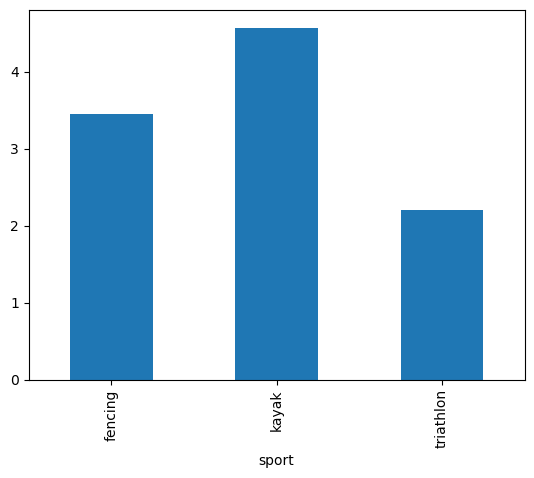

In [124]:
vo2_sport_max_df.plot(kind="bar")

# 20. Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?

In [125]:
merge_atheletes_sport_df['HR'] = 60 / (merge_atheletes_sport_df['RR']/1000)

merge_atheletes_sport_df.head()

,ID,time,RR,VO2,power,Label,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,pvt_threshold,HR
0,11,-168.600,727.0,0.287147,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0,82.530949
1,11,-167.872,728.0,0.287147,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0,82.417582
2,11,-167.148,724.0,0.287147,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0,82.872928
3,11,-166.484,664.0,0.320580,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0,90.361446
4,11,-165.836,648.0,0.320580,0,Warm Up,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0,92.592593


# Heart Rate vs Time trend plot

<Axes: xlabel='time'>

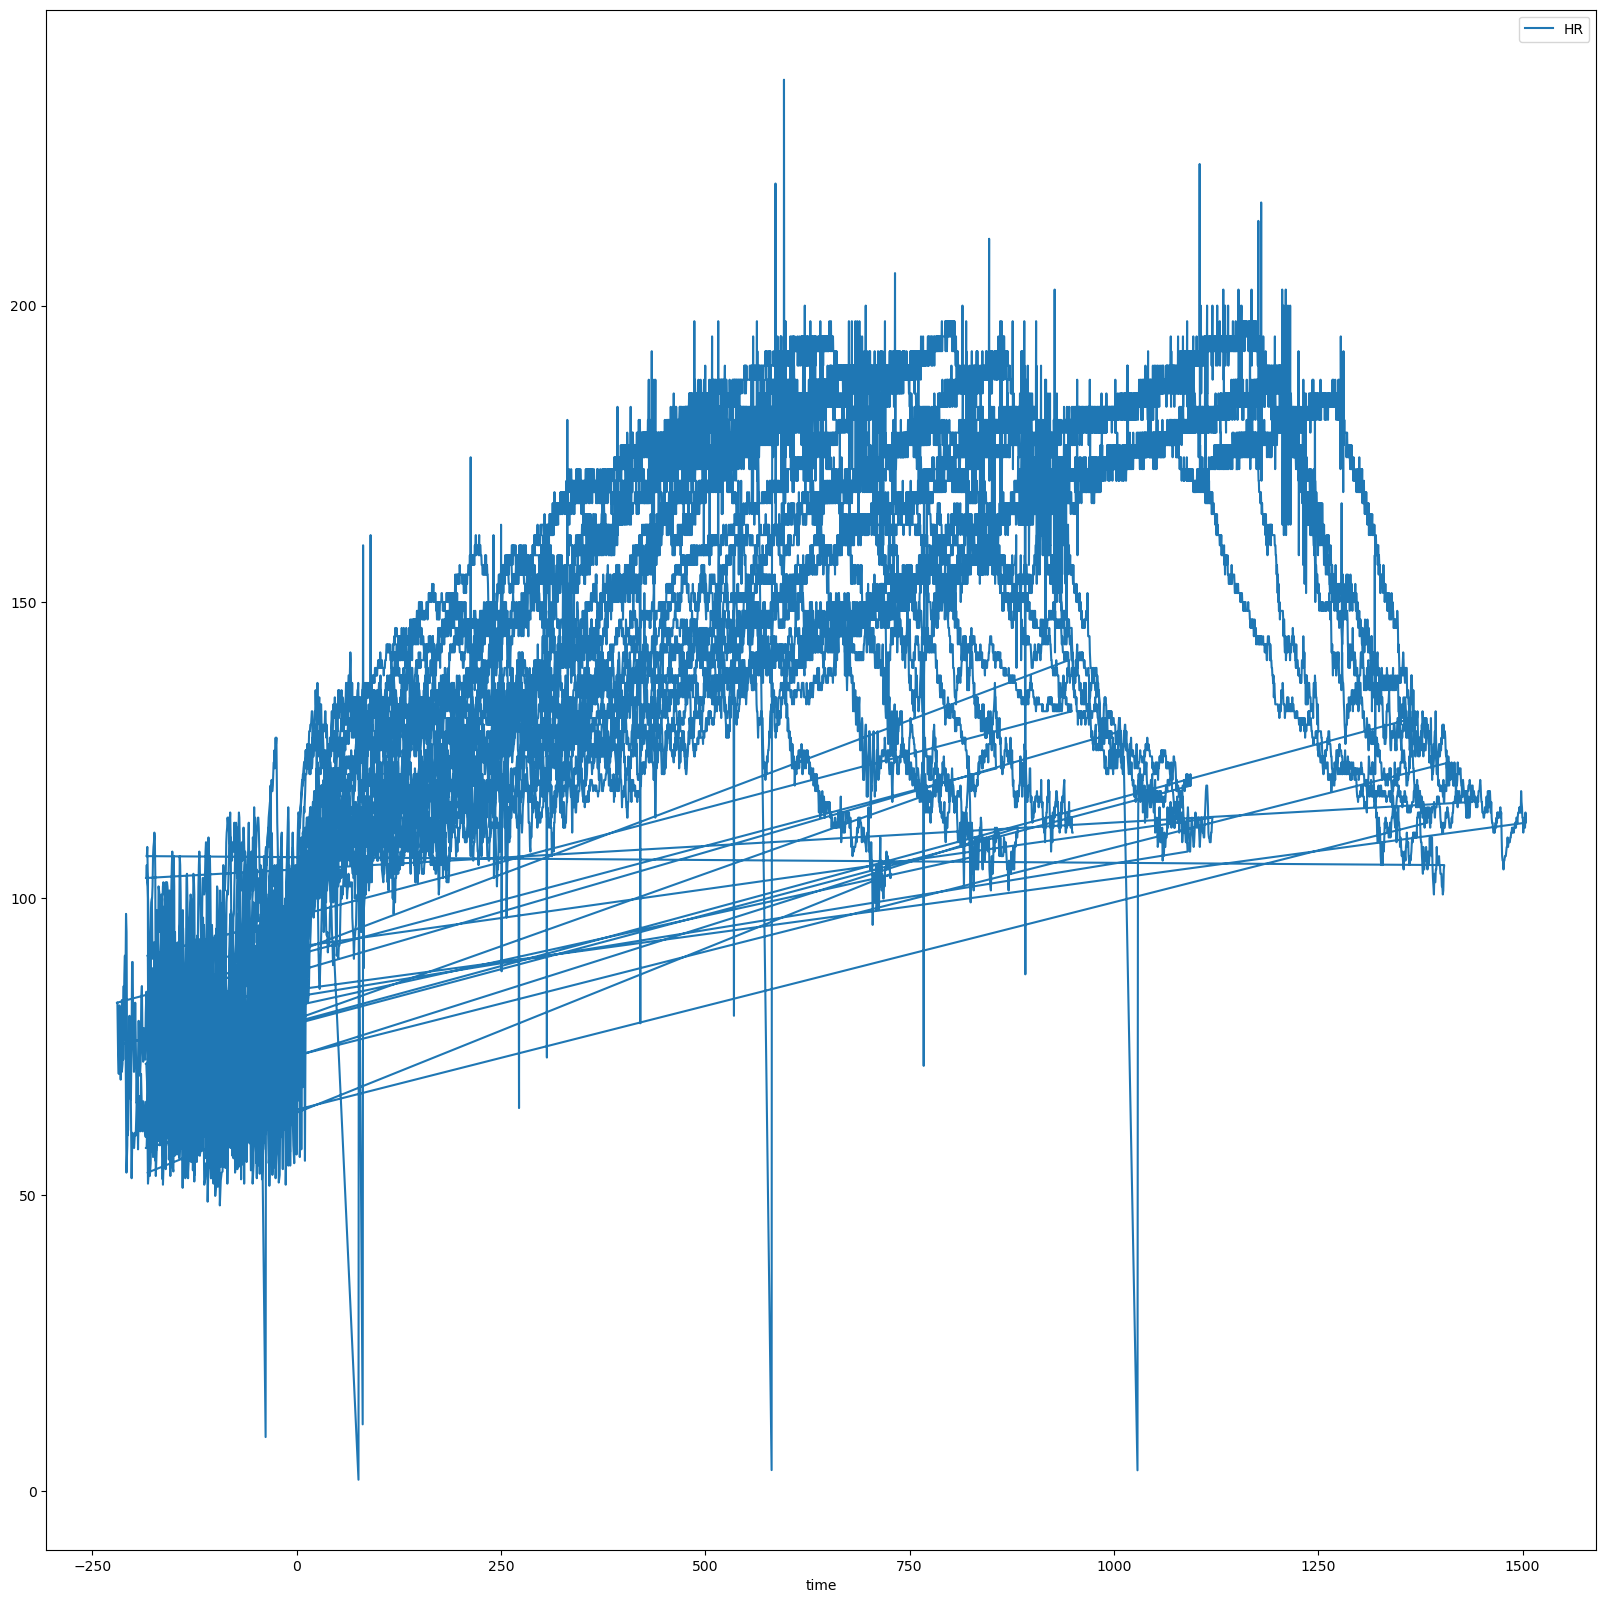

In [126]:
merge_atheletes_sport_df.plot(x='time', y='HR', kind='line',figsize=(20,20))

# 21 Display a pie chart of number of athletes by sport.

array([<Axes: ylabel='sport'>], dtype=object)

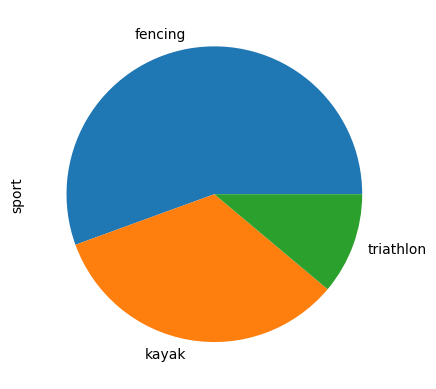

In [127]:
df_athletes.groupby(['sport'])['sport'].count().plot(kind='pie', subplots=True)

# 22. Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [128]:
import numpy as np
merge_atheletes_sport_df['even_odd_label']= np.where(merge_atheletes_sport_df['HR']%2 ==0, 'EVEN', 'ODD')
random_ten_hr_values = merge_atheletes_sport_df.sample(10)
random_ten_hr_values.head(10)

,ID,time,RR,VO2,power,Label,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,pvt_threshold,HR,even_odd_label
39222,7,652.672,404.0,1.106696,0,Cool down,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,86.5,148.514851,ODD
2008,11,784.836,400.0,2.330787,200,GET,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin,221.0,150.000000,EVEN
36625,6,809.160,344.0,2.270289,215,GET,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,158.5,174.418605,ODD
48367,17,438.416,352.0,1.612815,125,GET,12,39.9,156,101,145,triathlon,Male,Latino,Lucas,Foster,123.0,170.454545,ODD
5476,12,670.932,400.0,2.233157,185,GET,18,86.0,183,170,294,kayak,Male,African,Caleb,Dixon,232.0,150.000000,EVEN
35381,6,301.868,492.0,1.382211,95,GET,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,158.5,121.951220,ODD
15110,15,452.652,392.0,2.093750,125,GET,13,63.5,172,125,156,kayak,Male,Latino,Mason,Wallace,140.5,153.061224,ODD
39177,7,635.620,364.0,1.125039,0,Cool down,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,86.5,164.835165,ODD
17086,16,151.536,480.0,1.545398,50,GET,16,70.4,182,79,175,kayak,Male,Latino,Logan,Anderson,127.0,125.000000,ODD
19011,16,902.420,348.0,1.893189,0,Cool down,16,70.4,182,79,175,kayak,Male,Latino,Logan,Anderson,127.0,172.413793,ODD


# 23. Which heart rate zone did most participants spend the longest duration of time in?

In [129]:
merge_atheletes_sport_df['HR']=60/(merge_atheletes_sport_df['RR']/1000)
#df_combined_data.head()
def HR_zone(HR):
    if HR<100:
        return 'zone 1 (recovery/easy)'
    elif HR>=100 and HR<120:
        return 'zone 2 (aerobic/base)'
    elif HR>=120 and HR<135:
        return 'zone 3 (tempo)'
    elif HR>=135 and HR<155:
        return'zone 4 (lactate threshold)'
    elif HR>=155:
        return 'zone 5 (anaerobic)'
merge_atheletes_sport_df['HRzone'] =  merge_atheletes_sport_df['HR'].apply(HR_zone)

In [130]:
# calculating time each athlete spend in each hr zone
time_spent_in_each_zone_by_athlete = merge_atheletes_sport_df.groupby(['ID', 'HRzone'])['time'].sum().reset_index()

In [131]:
# finding hr zone each athlete spent max time
maximum_duration_HR_zone = time_spent_in_each_zone_by_athlete.loc[time_spent_in_each_zone_by_athlete.groupby('ID')['time'].idxmax()]

In [132]:
maximum_duration_HR_zone.head()

,ID,HRzone,time
4,1,zone 5 (anaerobic),665863.684
9,2,zone 5 (anaerobic),337038.976
14,3,zone 5 (anaerobic),1003104.000
19,4,zone 5 (anaerobic),1392462.744
24,5,zone 5 (anaerobic),1327351.612


# 24. Store athlete name and sport in a dictionary as a pair of values.

In [133]:
import pandas as pd
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes = pd.read_excel(xls, 'Athletes')

In [134]:
df_athletes['fullname'] = df_athletes['First Name'].apply(str)+ ' ' + df_athletes['Last Name'].apply(str)
df_athletes.head()

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,fullname
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,Olivia Martinez
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,Ethan Reynolds
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,Jackson Harper
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,Liam Sanchez
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,Ava Thompson


In [135]:
df_sports_name_dictionary = df_athletes.set_index('fullname') ['sport'].to_dict()

In [136]:
import json
print(json.dumps(df_sports_name_dictionary, sort_keys=True, indent=4))

{
    "Aiden Bennett": "fencing",
    "Ava Thompson": "fencing",
    "Caleb Dixon": "kayak",
    "Chloe Price": "fencing",
    "Ethan Reynolds": "fencing",
    "Grace Simmons": "fencing",
    "Harper Mitchell": "kayak",
    "Isabella Griffin": "kayak",
    "Jackson Harper": "fencing",
    "Liam Sanchez": "fencing",
    "Lily Jordan": "fencing",
    "Logan Anderson": "kayak",
    "Lucas Foster": "triathlon",
    "Mason Wallace": "kayak",
    "Mia Carpenter": "kayak",
    "Olivia Martinez": "fencing",
    "Owen Myers": "triathlon",
    "Sophia Rodriguez": "fencing"
}


# 25. Using arrays and loops, find the count of athletes based on gender.

In [137]:
import numpy as np
gender_array = np.array(df_athletes['Gender'])
male_counter = 0
female_counter = 0
for gender in gender_array:
    if gender == "Male":
        male_counter += 1
    elif gender == "Female":
        female_counter += 1

In [138]:
print(f"Male : {male_counter}")
print(f"Female: {female_counter}")

Male : 8
Female: 10


# 26. Create a sankey diagram to show the groups of race within each sport

In [139]:
# counting combinations of numbers of athletes w.r.t sport and ethnicity
counting_athletes_for_sport_race_combination = df_athletes.groupby(['sport', 'Ethnicity']).size().reset_index(name='athlete_count_by_sport_race')
counting_athletes_for_sport_race_combination.head()

,sport,Ethnicity,athlete_count_by_sport_race
0,fencing,African,4
1,fencing,White,6
2,kayak,African,2
3,kayak,Asian,2
4,kayak,Latino,2


In [140]:
# defining source, target and value
source = counting_athletes_for_sport_race_combination['sport'].tolist()
target = counting_athletes_for_sport_race_combination['Ethnicity'].tolist()
value = counting_athletes_for_sport_race_combination['athlete_count_by_sport_race'].tolist()

In [141]:
import plotly.graph_objects as go
# Prepared Data
data = {
    'source': source,
    'target': target,
    'value': value
}

# Create Sankey Diagram

labels = list(set(data['source'] + data['target']))
label_indices = {label: i for i, label in enumerate(labels)}

source_indices = [label_indices[label] for label in data['source']]
target_indices = [label_indices[label] for label in data['target']]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=data['value']
    )
)])

# Display the Diagram
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

# 27. Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

In [142]:
# rounded off time
merge_atheletes_sport_df['time_min'] = merge_atheletes_sport_df['time'].round()

In [143]:
# calculated average HR per minute
average_HR_per_minute = merge_atheletes_sport_df.groupby(['ID', 'time_min'])['HR'].mean().reset_index()

In [144]:
# merged average_HR_per_minute df to merged_athletes_sport_df and added average heart rate by the new name of column HR_average
merge_atheletes_sport_df = pd.merge(merge_atheletes_sport_df, average_HR_per_minute, on=['ID', 'time_min'], suffixes=('', '_average'))

In [145]:
merge_atheletes_sport_df[['First Name', 'Last Name', 'time_min', 'HR_average']].head(10)

,First Name,Last Name,time_min,HR_average
0,Isabella,Griffin,-169.0,82.530949
1,Isabella,Griffin,-168.0,82.417582
2,Isabella,Griffin,-167.0,82.872928
3,Isabella,Griffin,-166.0,91.477019
4,Isabella,Griffin,-166.0,91.477019
5,Isabella,Griffin,-165.0,91.490545
6,Isabella,Griffin,-165.0,91.490545
7,Isabella,Griffin,-164.0,75.000000
8,Isabella,Griffin,-163.0,75.757576
9,Isabella,Griffin,-162.0,77.720207


# 28. Print athlete 15s Age and Pvt1 using the format() function

In [146]:
athlete_15 = df_athletes.loc[df_athletes['ID']==15]
athlete_15.head()

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,fullname
14,15,13,63.5,172,125,156,kayak,Male,Latino,Mason,Wallace,Mason Wallace


In [147]:
age = athlete_15['age'].values[0]
P_vt1 = athlete_15['P_vt1'].values[0]
print("Age: {}" " " "P_vt1: {}".format(age, P_vt1))

Age: 13 P_vt1: 125


# 29. On average how long was each participants’ warm up?

In [148]:
# defined df with condition where condition is warmup
average_warmup_time_by_condition = combined_sport_data[combined_sport_data['Label']=='Warm Up']

In [149]:
# calculated average time for warm up condition and grouped by id.
average_warmup_time = average_warmup_time_by_condition.groupby('ID')['time'].mean().reset_index()
average_warmup_time.head()

,ID,time
0,1,-65.859723
1,2,-109.490490
2,3,-87.783847
3,4,-91.477280
4,5,-89.420743


# 30. Display the HRV of each athlete?

In [150]:
#calculating difference between rr values for each row athletewise
combined_sport_data['HRV'] = combined_sport_data.groupby('ID')['RR'].diff()
combined_sport_data = combined_sport_data.dropna()

In [151]:
#calculating standard deviation and labeling clumn as HRV
HRV = combined_sport_data.groupby('ID')['HRV'].std().reset_index()
HRV.head(18)

,ID,HRV
0,1,25.844717
1,2,40.725284
2,3,20.398306
3,4,33.334630
4,5,115.319339
5,6,447.371626
6,7,23.696380
7,8,504.482368
8,9,22.540326
9,10,26.865031


# 31. Return the count of athletes for any sport that the user inputs.

In [152]:
def sportwise_count_of_athletes():
    sport_name = input("Enter sport Name")
    print(sport_name)
    sport_array = np.array(df_athletes['sport'])
    athlete_count_sportwise = 0
    for sport in sport_array:
        if sport == sport_name:
            athlete_count_sportwise+=1 
    return f"{sport_name} has following number of athletes : {athlete_count_sportwise}"   

In [153]:
sportwise_count_of_athletes()

Enter sport NameKayaking
Kayaking


'Kayaking has following number of athletes : 0'

# 32. Insert the name of every athlete into an array and display the length of that array.

In [154]:
df_athletes['fullname'] = df_athletes['First Name'].apply(str)+ ' ' + df_athletes['Last Name'].apply(str)
athlete_name_array = np.array(df_athletes['fullname'])
athlete_name_array.__len__()

18

# Global variables

In [155]:
import pandas as pd
import numpy as np
import openpyxl as op
import matplotlib.pyplot as matplot
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_kayaking = pd.read_excel(xls, 'Kayaking')
df_fencing = pd.read_excel(xls, 'Fencing')
df_triathlon = pd.read_excel(xls, 'Triathlon')
dfAthletes = pd.read_excel(xls, 'Athletes')

df_combined_sport_data = pd.concat([df_kayaking, df_fencing, df_triathlon])

# 33. Create a list and a tuple. Print the types and lengths of  both.

In [156]:
#Create a list with athletes name
listAthletes = ["Olivia Martinez","Ethan Reynolds","Jackson Harper","Liam Sanchez","Ava Thompson","Grace Simmons","Aiden Bennett","Chloe Price","Lily Jordan","Isabella Griffin","Caleb Dixon","Mia Carpenter","Harper Mitchell"]

# create a tuple with athletes name
tupleAthletes = ("Olivia Martinez","Ethan Reynolds","Jackson Harper","Liam Sanchez","Ava Thompson","Grace Simmons","Aiden Bennett","Chloe Price","Lily Jordan","Isabella Griffin","Caleb Dixon","Mia Carpenter","Harper Mitchell")

#Get the type and length of the list
print("Type:", type(listAthletes))
print("Length:", len(listAthletes))

#Get the type and length of the tuple
print("Type:", type(tupleAthletes))
print("Length:", len(tupleAthletes))


Type: <class 'list'>
Length: 13
Type: <class 'tuple'>
Length: 13


# 34. Display a word cloud using any values in the dataset

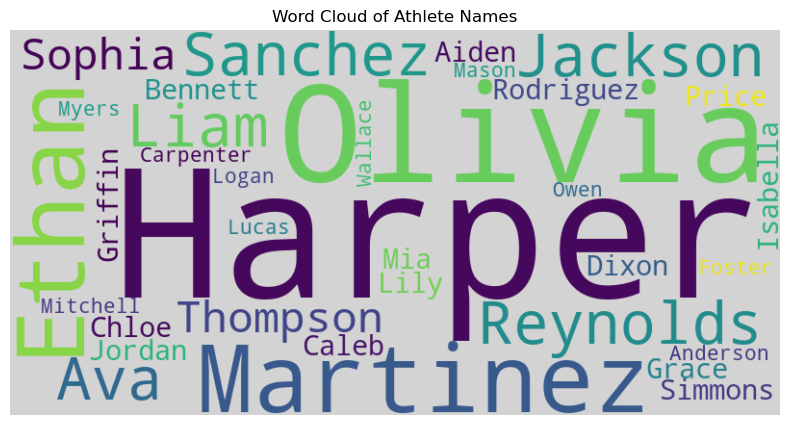

In [157]:
# Combine the names into a single string
fullName = ' '.join(dfAthletes['First Name'] + " " + dfAthletes['Last Name'])

# Generate the word cloud
wordcloudDisplay = WordCloud(width=800, height=400, background_color='lightgrey').generate(fullName)

# Display the word cloud using matplotlib in full name
matplot.figure(figsize=(10, 5))
matplot.imshow(wordcloudDisplay, interpolation='bilinear')
matplot.axis('off')
matplot.title('Word Cloud of Athlete Names')
matplot.show()

# 35. Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

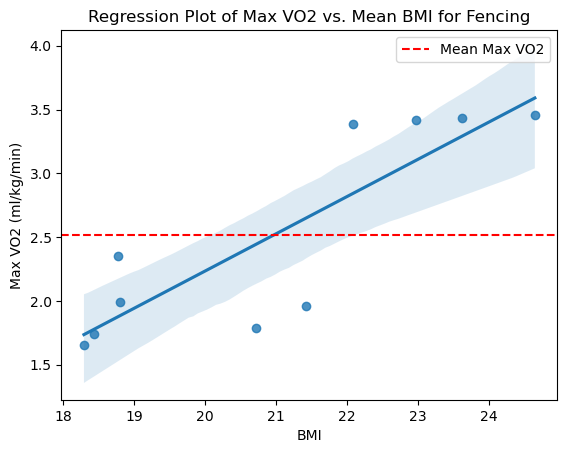

In [158]:
# to find the max vo2 for each athlete
maxVO2PerId = df_fencing.groupby('ID')['VO2'].max().reset_index()

df_max_consumed = dfAthletes.merge(maxVO2PerId, on='ID', how='inner')

# Calculate BMI for each athlete
# Convert Height from cm to m and calculate BMI
df_max_consumed['BMI'] = df_max_consumed['Weight'] / (pow(((df_max_consumed["Height"] / 100)), 2))

# Create a regression plot
sns.regplot(x='BMI', y='VO2', data=df_max_consumed)

# Display the plot
matplot.title('Regression Plot of Max VO2 vs. Mean BMI for Fencing')
matplot.xlabel('BMI')
matplot.ylabel('Max VO2 (ml/kg/min)')
matplot.axhline(df_max_consumed['VO2'].mean(), color='red', linestyle='--', label='Mean Max VO2')
matplot.legend()
matplot.show()

# 36. Plot the time series of HR( every 5 mins) of athlete 1

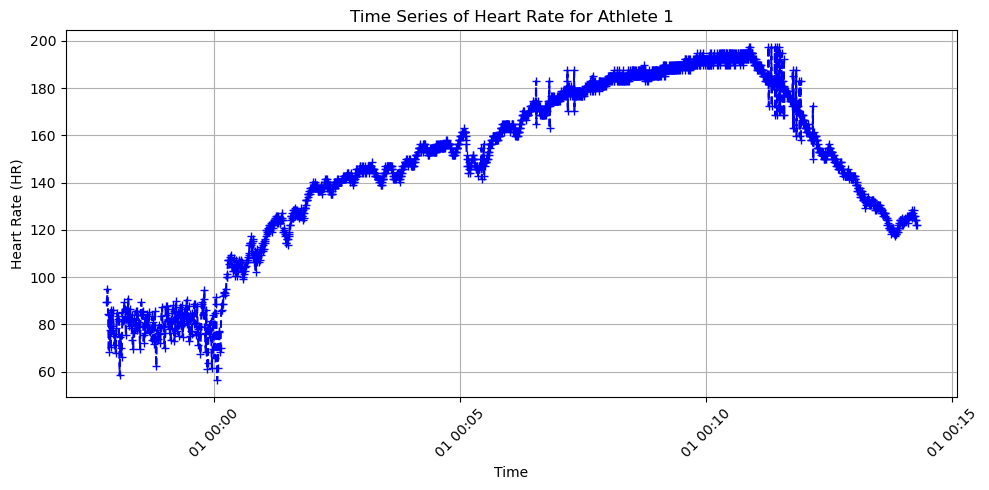

In [159]:
athleteid = 1
combined_df_with_athletes = dfAthletes.merge(df_combined_sport_data, on='ID', how='inner')

# Filter the DataFrame for the specific athlete and create a copy
filtered_df = combined_df_with_athletes[combined_df_with_athletes['ID'] == athleteid].copy()

# Calculate heart rate using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'Heart_rate_bpm'] = (60 / (filtered_df['RR'] / 1000))

# Ensure the 'time' column is numeric (in seconds)
filtered_df['time'] = pd.to_numeric(filtered_df['time'])

# Convert time to a readable format (example- starting from a specific date
start_time = pd.Timestamp('2023-01-01 00:00:00')
filtered_df['time'] = start_time + pd.to_timedelta(filtered_df['time'], unit='s')

# Ensure 'time' is of datetime type
filtered_df['time'] = pd.to_datetime( filtered_df['time'] )

# Plot the time series of HR (RR) for Athlete 1
matplot.figure(figsize=(10, 5))
matplot.plot(filtered_df['time'], filtered_df['Heart_rate_bpm'], marker='+', linestyle='--', color='b')
matplot.title('Time Series of Heart Rate for Athlete 1')
matplot.xlabel('Time')
matplot.ylabel('Heart Rate (HR)')
matplot.xticks(rotation=45)
matplot.grid()
matplot.tight_layout()
matplot.show()

# 37. What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [160]:
# Find the maximum power and the corresponding participant
max_power_row = dfAthletes.loc[dfAthletes['P_vt2'].idxmax()]

# Extracting the details
max_power_name = max_power_row['First Name'] + " " + max_power_row['Last Name']
max_power_sport = max_power_row['sport']
max_power_value = max_power_row['P_vt2']

# Display the results
print("Participant with Maximum Power:")
print(f"Name: {max_power_name}, Sport: {max_power_sport}, Power: {max_power_value} watts")

Participant with Maximum Power:
Name: Jackson Harper, Sport: fencing, Power: 300 watts


# 38. What is the average difference in IBI during the warm up Vs the actual test?

In [161]:
# Function to calculate average IBI difference for each ID
def calculate_average_difference(df):
    resultsArr = []
    for id_value in df_combined_sport_data['ID'].unique():
        id_data = df_combined_sport_data[df_combined_sport_data['ID'] == id_value]
        warm_up_ibi = id_data[id_data['time'] < 0]['RR'].mean()
        test_ibi = id_data[id_data['time'] >= 0]['RR'].mean()
        average_difference = warm_up_ibi - test_ibi
        resultsArr.append({'ID': id_value, 'Average Difference': average_difference})
    
    # Create a DataFrame from results and sort by ID
    results_display_df = pd.DataFrame(resultsArr)
    results_display_df = results_display_df.sort_values(by='ID')
    return results_display_df

# Calculate the average differences and sort by ID
average_differences_sorted = calculate_average_difference(df_combined_sport_data)
average_differences_sorted

,ID,Average Difference
6,1,371.203743
7,2,497.323121
8,3,336.112741
9,4,267.851159
10,5,349.523512
11,6,434.547830
12,7,326.815951
13,8,469.227723
14,9,308.286717
15,10,379.616846


# 39. Print out what's in indexes 7, 10, and 3 for the array in Q33.

In [162]:
#Question 33
#Create a list with athletes name
listAthletes = ["Olivia Martinez","Ethan Reynolds","Jackson Harper","Liam Sanchez","Ava Thompson","Grace Simmons","Aiden Bennett","Chloe Price","Lily Jordan","Isabella Griffin","Caleb Dixon","Mia Carpenter","Harper Mitchell"]

print(listAthletes[6])
print(listAthletes[9])
print(listAthletes[2])

Aiden Bennett
Isabella Griffin
Jackson Harper


# 40. [ 1,  2,  3,  4,  5],[ 6,  7,  8,  9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

In [163]:
arrayDisplay = np.array([[ 1,  2,  3,  4,  5],[ 6,  7,  8,  9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26,27,28,29,30]])

# Use array slicing to display elements 1,3,5.
selected_elements = arrayDisplay[:, [0, 2, 4]]

#  If the value is less than 4 display it as 99
selected_elements[selected_elements < 4] = 99

# Display the result
print(selected_elements)

[[99 99  5]
 [ 6  8 10]
 [11 13 15]
 [16 18 20]
 [21 23 25]
 [26 28 30]]


# 41. What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [164]:
df_combined_sport_data_athletes=dfAthletes.merge(df_combined_sport_data,on='ID',how='inner')
# Get the last entry for each participant
last_entries = df_combined_sport_data_athletes.loc[df_combined_sport_data_athletes.groupby('ID')['time'].idxmax()]

# Find the participant with the lowest wattage
lowest_wattage = last_entries.loc[last_entries['power'].idxmin()]
# Display the result
result = {
    'Name': lowest_wattage['First Name'],
    'Sport': lowest_wattage['sport'],
    'Watts': lowest_wattage['power']
}

print('Name:', result['Name'])
print('Sport:', result['Sport'])
print('Watts:', result['Watts'])

Name: Olivia
Sport: fencing
Watts: 0


# 42. What was the difference in heart rate between warm up and GET for athlete 1

In [165]:

athleteid = 1
filtered_athlets_df = dfAthletes[dfAthletes['ID'] == athleteid]

df_combined_sport_data_athletes = filtered_athlets_df.merge(df_combined_sport_data, on='ID', how='inner')

# Assuming warm-up is all rows before time 0 and GET is the first row at time 0
warmUpHour = df_combined_sport_data_athletes[df_combined_sport_data_athletes['time'] < 0]['RR'].mean()
getHour = df_combined_sport_data_athletes[df_combined_sport_data_athletes['time'] >= 0]['RR'].mean()

# Calculate the difference
difference = getHour - warmUpHour
getHour = 60 / (getHour / 1000)
warmUpHour = 60 / (warmUpHour / 1000)
difference = getHour - warmUpHour 
print('Warm Up Heart Rate:',  warmUpHour)
print('GET Heart Rate:',  getHour)
print('Difference in heart rate between warm up and GET for athlete 1:',  difference)


Warm Up Heart Rate: 79.41122467715283
GET Heart Rate: 156.10489128659364
Difference in heart rate between warm up and GET for athlete 1: 76.69366660944081


# 43. Create a pivot table that shows count of patients within each age group and sport

In [166]:
# Creating the pivot table
pivot_table = dfAthletes.pivot_table(index='age', columns='sport', values='ID', aggfunc='count', fill_value=0)

# Display the pivot table
print(pivot_table)

sport  fencing  kayak  triathlon
age                             
12           0      0          2
13           0      2          0
14           2      0          0
15           4      0          0
16           2      1          0
17           2      0          0
18           0      3          0


# 44. Display a  distrubution chart of MAX V02 for all athletes

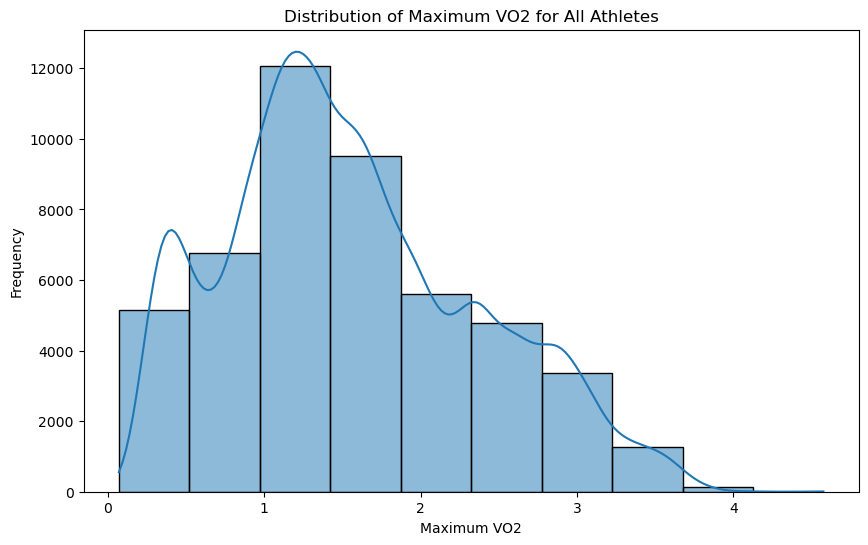

In [167]:
df_combined_sport_data_athletes = dfAthletes.merge(df_combined_sport_data, on='ID', how='inner')
# Group by 'time' (assuming it represents different athletes) and get max VO2
max_vo2 = df_combined_sport_data_athletes.groupby('time')['VO2'].max()

# Plotting the distribution
matplot.figure(figsize=(10, 6))
sns.histplot(max_vo2, bins=10, kde=True)
matplot.title('Distribution of Maximum VO2 for All Athletes')
matplot.xlabel('Maximum VO2')
matplot.ylabel('Frequency')
matplot.show()


# 45. Create a dummy array with no data with a size of 15.

In [168]:
# Create a dummy array of size 15 filled with NaN
dummy_array = np.full(15, '')

# Display the dummy array
print(dummy_array)

['' '' '' '' '' '' '' '' '' '' '' '' '' '' '']


# 46. How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [169]:
athleteid = 15
filtered_athlets_df = dfAthletes[dfAthletes['ID'] == athleteid]

df_combined_sport_data_athletes = filtered_athlets_df.merge(df_combined_sport_data, on='ID', how='inner')

# Calculate total time in minutes
totalTimeSeconds = df_combined_sport_data_athletes['time'].max() - df_combined_sport_data_athletes['time'].min()
totalTimeMinutes = totalTimeSeconds / 60

# Calculate total VO2 max
total_vo2 = df_combined_sport_data_athletes['VO2'].sum()

print("Total exercise time:",totalTimeMinutes)
print("Max VO2 consumed:",total_vo2)

Total exercise time: 19.877133333333333
Max VO2 consumed: 4250.440182233


# 47. Convert ' sport' into a numeric field through Label encoding

In [170]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

df_athletesWithSportLabel = dfAthletes
# Fit and transform the 'sport' column
df_athletesWithSportLabel['sport-label'] = label_encoder.fit_transform(dfAthletes['sport'])

combinedOutput = "\n".join(f"{sport} - {label}" for sport, label in zip(df_athletesWithSportLabel['sport'].unique(), df_athletesWithSportLabel['sport-label'].unique()))
print(combinedOutput)


fencing - 0
kayak - 1
triathlon - 2


# 48. What was the average age of the athletes?

In [171]:
# Calculate the average age
average_age = dfAthletes['age'].mean()

print("Average age of the athletes:", average_age.round(2))

Average age of the athletes: 15.22


# 49.Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [172]:
import pandas as pd
dataset = pd.read_excel ("V02Max_Combined.xlsx")
Fencing = pd.read_excel ("V02Max_Combined.xlsx", sheet_name = 'Fencing')
Athletes = pd.read_excel ("V02Max_Combined.xlsx", sheet_name = 'Athletes')

df_merge_file = Fencing.merge(Athletes, on='ID', how='inner')
sorted_df = df_merge_file.sort_values(by='RR')
min_ibi_row = sorted_df.iloc[0]
print(min_ibi_row)

ID                   7
time           596.372
RR                 252
VO2           1.293014
power              155
age                 15
Weight            49.8
Height             165
P_vt1               65
P_vt2              108
sport          fencing
Gender          Female
Ethnicity        White
First Name       Grace
Last Name      Simmons
Name: 19582, dtype: object


# 50.Create a violin chart using any 2 columns in the dataset

<Axes: xlabel='age', ylabel='Weight'>

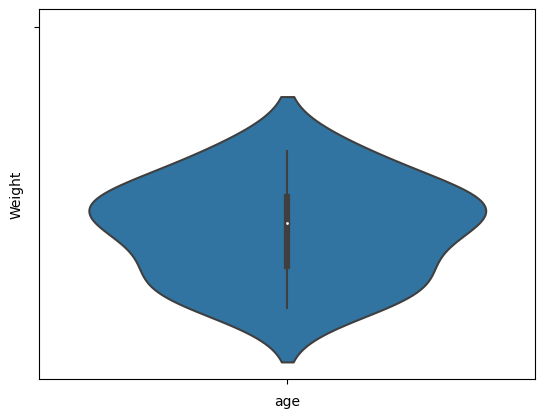

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_excel ("V02Max_Combined.xlsx")
Athletes= pd.read_excel ("V02Max_Combined.xlsx", sheet_name = 'Athletes')
sns.violinplot(x=Athletes['age'])
sns.violinplot(y=Athletes['Weight'])

# 51.List every athlete’s V02 ml/kg

In [174]:
import pandas as pd
dataset = pd.read_excel ("V02Max_Combined.xlsx")
Athletes = pd.read_excel ("V02Max_Combined.xlsx", sheet_name = 'Athletes')
df_combined_data=pd.read_excel("combined_sports_data.xlsx")

df_merge_file = Athletes.merge(df_combined_data, on='ID', how='inner')
grouped_df = df_merge_file.groupby('ID')['VO2'].sum()
x_df = pd.DataFrame(grouped_df).reset_index()
x_df = x_df.merge(Athletes[['ID', 'First Name', 'Last Name', 'Weight']], on='ID', how='left')
x_df['VO2_ml/kg'] = x_df['VO2'] / x_df['Weight']
print(x_df[['First Name', 'Last Name', 'VO2_ml/kg']])

   First Name  Last Name  VO2_ml/kg
0      Olivia   Martinez  42.807730
1       Ethan   Reynolds  38.632602
2     Jackson     Harper  69.705657
3        Liam    Sanchez  76.989878
4         Ava   Thompson  86.742579
5      Sophia  Rodriguez  71.679465
6       Grace    Simmons  38.403988
7       Aiden    Bennett  44.822092
8       Chloe      Price  49.697342
9        Lily     Jordan  55.122171
10   Isabella    Griffin  89.586903
11      Caleb      Dixon  92.258212
12        Mia  Carpenter  90.758693
13     Harper   Mitchell  54.869902
14      Mason    Wallace  66.936066
15      Logan   Anderson  69.661622
16      Lucas     Foster  73.789806
17       Owen      Myers  81.208775


# 52.Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [175]:
import pandas as pd

dataset = pd.read_excel("V02Max_Combined.xlsx")
Athletes = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')
df_combined_data = pd.read_excel("combined_sports_data.xlsx")

df_merge_file = Athletes.merge(df_combined_data, on='ID', how='inner')

grouped_df = df_merge_file.groupby('ID')['VO2'].sum()
x_df = pd.DataFrame(grouped_df).reset_index()
x_df = x_df.merge(Athletes[['ID', 'First Name', 'Last Name', 'Weight']], on='ID', how='left')
x_df['VO2_ml/kg'] = x_df['VO2'] / x_df['Weight']

def calculate_hr(rr_interval):
    if pd.notna(rr_interval) and rr_interval > 0:
        return 60 / (rr_interval / 1000)
    else:
        return None

df_merge_file['HR'] = df_merge_file['RR'].apply(calculate_hr)

x_df = x_df.merge(df_merge_file[['ID', 'HR']], on='ID', how='left')

fittest_athlete = x_df.loc[x_df['VO2_ml/kg'].idxmax()]

print(f"Fittest athlete based on VO2_ml/kg:")
print(f"First Name: {fittest_athlete['First Name']}")
print(f"Last Name: {fittest_athlete['Last Name']}")
print(f"VO2_ml/kg: {fittest_athlete['VO2_ml/kg']:.2f}")
print(f"Average HR: {fittest_athlete['HR']:.2f}")

Fittest athlete based on VO2_ml/kg:
First Name: Caleb
Last Name: Dixon
VO2_ml/kg: 92.26
Average HR: 81.19


Insight: 
Heart Rate and VO2 ml/kg measures is recognized as overall indicators of cardiovascular fitness of an athlete. 
Therefore, I choose to calculate the Heart Rate and VO2 ml/kg max measure to identify the Fittest athlete in the given Dataset.

# 53.Phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  Find the phone number of Jill

In [176]:
phonebook = {
    "john": 938477566,
    "Jack": 938377264,
    "Jill": 947662781
}
print (phonebook['Jill'])

947662781


# 54.Create a Pie chart for  Athletes and explode the wedge with Highest V02 kg/ml in and Label by Athlete ID

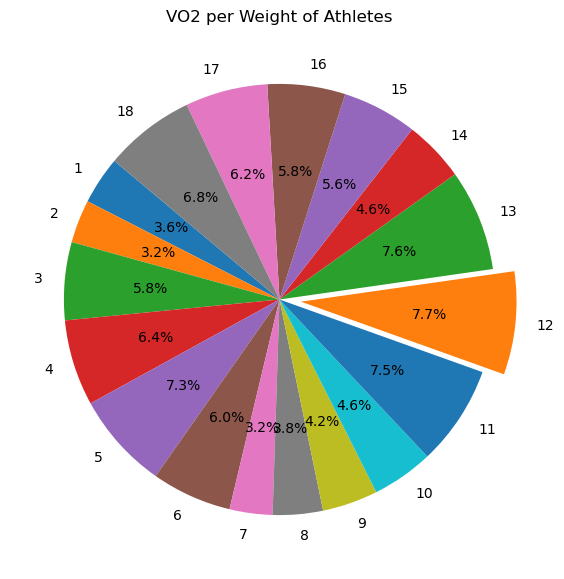

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_excel("V02Max_Combined.xlsx")
Athletes = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')
df_combined_data = pd.read_excel("combined_sports_data.xlsx")

df_merge_file = Athletes.merge(df_combined_data, on='ID', how='inner')

grouped_df = df_merge_file.groupby('ID')['VO2'].sum()
x_df = pd.DataFrame(grouped_df).reset_index()

x_df = x_df.merge(Athletes[['ID', 'First Name', 'Last Name', 'Weight']], on='ID', how='left')


x_df['VO2_ml/kg'] = x_df['VO2'] / x_df['Weight']

max_vo2_idx = x_df['VO2_ml/kg'].idxmax()

explode = [0] * len(x_df)  
explode[max_vo2_idx] = 0.1  

plt.figure(figsize=(10, 7))
plt.pie(x_df['VO2_ml/kg'], 
        labels=x_df['ID'], 
        explode=explode, 
        autopct='%1.1f%%', 
        startangle=140)

plt.title('VO2 per Weight of Athletes')
plt.show()

# 55.Using a for loop iterate through HR for all triathletes and display all details of the athlete with the highest heart rate

In [178]:
import pandas as pd

dataset = pd.read_excel("V02Max_Combined.xlsx")
Triathlon = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Triathlon')
df_combined_data = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')
df_merge_file=Triathlon.merge(df_combined_data,on='ID',how='inner')

def calculate_hr(rr_interval):
    if pd.notna(rr_interval) and rr_interval > 0: 
        return 60 / (rr_interval / 1000)
    else:
        return None

df_merge_file['HR'] = df_merge_file['RR'].apply(calculate_hr)

print(df_merge_file[df_merge_file.HR == df_merge_file.HR.max()])

      ID     time     RR       VO2  power  age  Weight  Height  P_vt1  P_vt2  \
4152  18  628.644  304.0  1.909147    170   12    39.7     158     65    168   

          sport Gender Ethnicity First Name Last Name          HR  
4152  triathlon   Male    Latino       Owen     Myers  197.368421  


# 56. Display a histogram to show distribution of athletes by sport.

sport
fencing      10
kayak         6
triathlon     2
dtype: int64


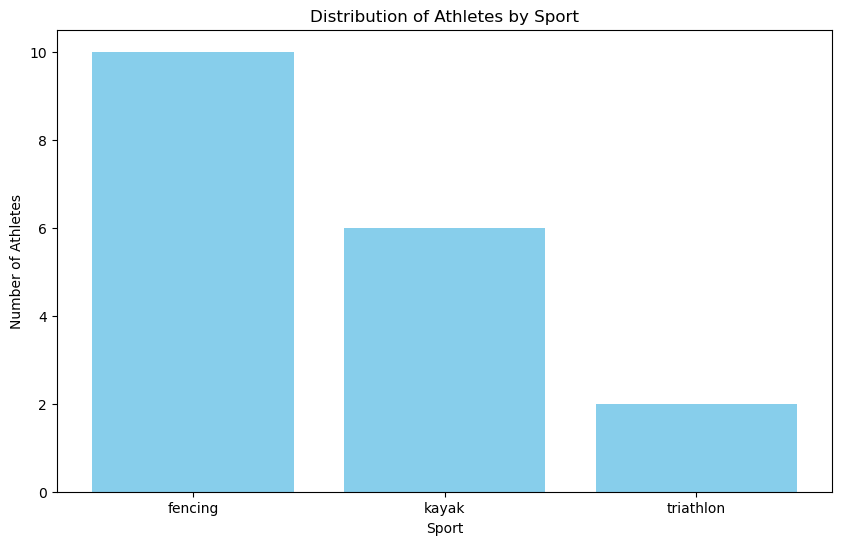

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_excel("V02Max_Combined.xlsx")
Athletes = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')

df_athlete = Athletes

athletes_sport = df_athlete.groupby('sport').size()

print(athletes_sport)

sports = athletes_sport.index
num_athletes = athletes_sport.values

plt.figure(figsize=(10, 6))
plt.bar(sports, num_athletes, color='skyblue')

plt.title('Distribution of Athletes by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')

plt.show()

# 57.Get the first letter of last name of students using for loops and RegEX

In [180]:
import pandas as pd
import re

dataset = pd.read_excel ("V02Max_Combined.xlsx")
Athletes = pd.read_excel ("V02Max_Combined.xlsx", sheet_name = 'Athletes')

names = pd.DataFrame(Athletes)

print(names)
first_letters = []


for last_name in names['Last Name']:

    match = re.search(r'\b(\w)', last_name.split()[-1])
    if match:
        
        first_letter = match.group(1).upper()  
        first_letters.append(first_letter)
    else:
        
        first_letters.append(None)

names['First Letter of Last Name'] = first_letters

print(names[['Last Name', 'First Letter of Last Name']])

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

# 58. What is the average % difference in heart rate between warm up and GET for all athletes?

In [181]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#define file path
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes=pd.read_excel(xls,'Athletes')

df_combined_data=pd.read_excel("labeled_combined_sports_data.xlsx")

#merging two sheets
df_merge_file=df_athletes.merge(df_combined_data,on='ID',how='inner')
#print(df_merge_file.head())

#Find HR for each record
df_merge_file['HR']= 60/(df_merge_file['RR']/1000)

#df_merge_file['warmup_df'] = df_combined_data[df_combined_data['Label'] == 'Warm Up']
#df_merge_file['test_df'] = df_combined_data[df_combined_data['Label'] == 'GET']

#GET_HR=df_merge_file['HR'].groupby('ID')['Warm Up'].count()
#print(GET_HR)

#merged_df = pd.merge(warmup_df, test_df, on='ID')
#print(df_merge_file)


# Calculate the percentage difference for each athlete
#merged_df['HR_diff_percent'] = ((merged_df['test_df'] - merged_df['warmup_df']) / merged_df['warmup_df']) * 100

# Step 4: Compute the average percentage difference
average_diff = df_merge_file['HR'].mean()

print(f"The average percentage difference in heart rate between warmup and test phases is: {average_diff:.2f}%")



The average percentage difference in heart rate between warmup and test phases is: 143.89%


# 59.Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [182]:
import pandas as pd

dataset = pd.read_excel("V02Max_Combined.xlsx")
Athletes = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')
df_combined_data = pd.read_excel("combined_sports_data.xlsx")

df_merge_file = Athletes.merge(df_combined_data, on='ID', how='inner')

grouped_df = df_merge_file.groupby('ID')['VO2'].sum()
x_df = pd.DataFrame(grouped_df).reset_index()

x_df = x_df.merge(Athletes[['ID', 'First Name', 'Last Name', 'Height', 'sport']], on='ID', how='left')

x_df = x_df.merge(Athletes[['ID', 'Weight']], on='ID', how='left')
x_df['VO2_ml/kg'] = x_df['VO2'] / x_df['Weight']

tallest_athlete = x_df.loc[x_df['Height'].idxmax()]
tallest_athlete_name = f"{tallest_athlete['First Name']} {tallest_athlete['Last Name']}"
tallest_athlete_sport = tallest_athlete['sport']
tallest_athlete_vo2 = tallest_athlete['VO2_ml/kg']


print(f"Tallest Athlete: {tallest_athlete_name}")
print(f"Sport: {tallest_athlete_sport}")
print(f"VO2 ml/kg: {tallest_athlete_vo2:.2f}")

Tallest Athlete: Jackson Harper
Sport: fencing
VO2 ml/kg: 69.71


# 60.Get the last letter of athletes last names using RegEX

In [183]:
import pandas as pd
import re 

dataset = pd.read_excel("V02Max_Combined.xlsx")
Athletes = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')


last_names = Athletes['Last Name']

def get_last_letter(name):
    match = re.search(r'.$', name)
    return match.group() if match else None

last_letters = last_names.apply(get_last_letter)

print(last_letters)

0     z
1     s
2     r
3     z
4     n
5     z
6     s
7     t
8     e
9     n
10    n
11    n
12    r
13    l
14    e
15    n
16    r
17    s
Name: Last Name, dtype: object


# 61.Reverse an arrays order in Python. You can use any array with any values you like.

In [184]:
zipcode = [63368, 30124, 500362, 73895, 49382]
reversed_array = zipcode[::-1]
print(reversed_array)

[49382, 73895, 500362, 30124, 63368]


# 62.What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [185]:
import pandas as pd
import numpy as np

df_combined_data=pd.read_excel("combined_sports_data.xlsx")
filter_data = df_combined_data[df_combined_data['time'] >= 0]
def calculate_rmssd(find_intervals):
    diff_rr = np.diff(find_intervals)
    squared_diff = diff_rr ** 2
    mean_squared_diff = np.mean(squared_diff)
    return np.sqrt(mean_squared_diff)
group_athletes = filter_data.groupby('ID')
#
rmssd_results = group_athletes.apply(lambda group: calculate_rmssd(group.loc[group['time'] <= 1800, 'RR'].dropna()))
print(rmssd_results)

ID
1      13.513631
2       8.544603
3       5.181184
4      15.529356
5     116.894582
6     465.358949
7      16.246692
8     528.105544
9       5.819242
10      5.684505
11      6.459711
12      7.808307
13      7.017273
14     21.669570
15     11.391307
16    827.772742
17     10.632181
18      8.827054
dtype: float64


# 63.On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [186]:
import pandas as pd

dataset = pd.read_excel("V02Max_Combined.xlsx")
Athletes = pd.read_excel("V02Max_Combined.xlsx", sheet_name='Athletes')
df_combined_data = pd.read_excel("combined_sports_data.xlsx")

df_merge_file = Athletes.merge(df_combined_data, on='ID', how='inner')

def calculate_hr(rr_interval):
    if pd.notna(rr_interval) and rr_interval > 0:
        return 60 / (rr_interval / 1000)
    else:
        return None

df_merge_file['HR'] = df_merge_file['RR'].apply(calculate_hr)

df_merge_file['Label'] = df_merge_file['HR'].apply(lambda hr: 'Zone 5' if hr > 155 else 'Other')

zone_5_data = df_merge_file[df_merge_file['Label'] == 'Zone 5']

if 'time' in zone_5_data.columns:
    total_time_zone_5 = zone_5_data.groupby('ID')['time'].sum().reset_index()
    total_time_zone_5.columns = ['ID', 'Total Time in Zone 5']

    average_time_zone_5 = total_time_zone_5['Total Time in Zone 5'].mean()
    
    print("Total time spent in Zone 5 by each athlete:")
    print(total_time_zone_5)
    
    print(f"\nAverage time spent in Zone 5: {average_time_zone_5:.2f}")

Total time spent in Zone 5 by each athlete:
    ID  Total Time in Zone 5
0    1            665863.684
1    2            337038.976
2    3           1003104.000
3    4           1392462.744
4    5           1327351.612
5    6            709450.484
6    7            434096.300
7    8            397918.448
8    9            794825.752
9   10            875252.900
10  11            742750.396
11  12           1406708.024
12  13           1439558.824
13  14            801810.092
14  15            779305.300
15  16            817997.360
16  17            315787.324
17  18            669512.272

Average time spent in Zone 5: 828377.47


# 64  Count athletes based on Gender using count plot

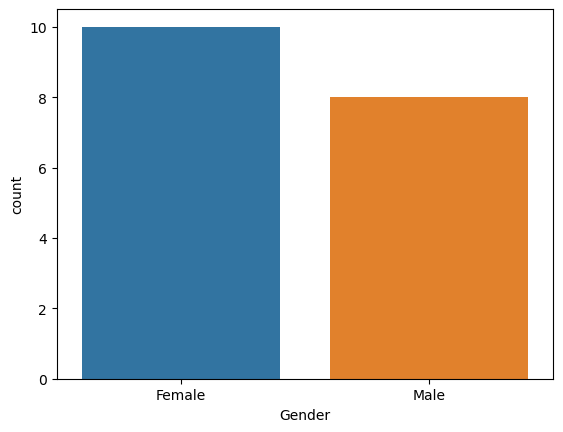

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#open excel file
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')

# read the excel sheet
df_athletes=pd.read_excel(xls,'Athletes')

# count athletes
sns.countplot(x ="Gender", data = df_athletes)

plt.show()

#  65 Array slicing to display elements from given array

In [188]:
# Print Given array
#name the array as 'arr'
arr=[ [ 1,  2,  3,  4,  5],
 [ 6,  7,  8,  9, 10],
 [11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25],
 [26, 27, 28, 29, 30] ]

print('\nGiven Array:',arr) 

# slice array to display elements 4, 7, 10 & 17

print('\nDisplay Elements:', arr[0][3],arr[1][1],arr[1][4],arr[3][1])


Given Array: [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25], [26, 27, 28, 29, 30]]

Display Elements: 4 7 10 17


# 66 On avg, how long did each participant spend at 200 watts

Analysis: For each athlete, find out min and max 'time' for 'power=200 watts'. Then, find out the difference between these two values. This is the time duration where each participant spend in power 200 watts. To calculate average, lets divide the sum of time duration by the total athletes.

In [189]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

#define file path
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes=pd.read_excel(xls,'Athletes')
df_combined_data=pd.read_excel("combined_sports_data.xlsx")

#find out total athletes count
athletes_counts=df_athletes['ID'].count()
#print(athletes_counts)

#merging two sheets
merge_file=df_athletes.merge(df_combined_data,on='ID',how='inner')

#find min value for each athletes (time values in sec)
df_200_watts=df_combined_data[df_combined_data['power']==200]
df_min=df_200_watts.groupby('ID')['time'].min()
#print(df_min)

#find max value for each athletes(time values in sec)
df_max=df_200_watts.groupby('ID')['time'].max()
#print(df_max)

#find the time difference in seconds
df_time_at_200=df_max-df_min
#print(df_time_at_200)

#find the total time durations
df_total_time=df_time_at_200.sum()
#print(df_total_time)

#find the average
avg_time=df_total_time/athletes_counts
print("\naverage time in 200 watts:", avg_time ,"seconds")


average time in 200 watts: 36.53311111111112 seconds


# 67  Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

Analysis:First find out vo2max value. Now, group the sports ased on the vo2max value and then find out the average value for each sport. Next, find the highest average value of vo2 max and find the sport which has the highest average value.

In [190]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# open sheet "Athletes" from source file
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df=pd.read_excel(xls,'Athletes')

# read combined sport data file
df_combined_data=pd.read_excel('combined_sports_data.xlsx')
# merge the two data based on ID
df_merge_file=df.merge(df_combined_data,on='ID',how='inner')

#df_merge_file['VO2']=df_merge_file['VO2'].sum()
#print(df_merge_file)

df_merge_file['VO2max']=df_merge_file['VO2']/df_merge_file['Weight']
#print(df_merge_file['VO2max'])


#print("-------vo2 sum by id-------------")
vo2max_sum_by_id = df_merge_file.groupby('sport')['VO2max'].mean().reset_index()
#print(vo2max_sum_by_id)

max_avg = max(vo2max_sum_by_id['VO2max'])
print("\n Highest average value:" ,max_avg)

filtered_rows = vo2max_sum_by_id[vo2max_sum_by_id['VO2max'] == max_avg]['sport'].values[0]
print("\n sport with highest average value:" ,filtered_rows)



#VO2Max = Total VO2 of a person / divided by the person weight



#df_merge_file['VO2_total']=df_merge_file['VO2'].sum()
#print(df_merge_file)

#df_merge_file['total_weight']=df_merge_file['Weight'].sum()
#df_merge_file['VO2max']=df_merge_file['VO2_total']/df_merge_file['total_weight']
#print(df_merge_file['VO2max'])

#df_merge_file['avg_vo2max']= df_merge_file['VO2max'].mean()
#print(df_merge_file['avg_vo2max'])


 Highest average value: 0.031117964535811515

 sport with highest average value: triathlon


# 68  What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

Analysis:After merging two files, first find out the HR value, then calculate max_HR value. Next,find out 90% of max_HR for each record. Find out the athletes who are all exceeding 90percent of HRmax Value. Finally,find out the percentage of athletes.

In [191]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#define file path
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes=pd.read_excel(xls,'Athletes')

df_combined_data=pd.read_excel("combined_sports_data.xlsx")

#merging two sheets
df_merge_file=df_athletes.merge(df_combined_data,on='ID',how='inner')
#print(df_merge_file.head())

#Find HR for each record
df_merge_file['HR']= 60/(df_merge_file['RR']/1000)

#calculate max HR
df_merge_file['max_HR']=220-df_merge_file['age']
#print(df_athletes_max_RR)

df_merge_file['90_per_of_max_HR']=0.9*df_merge_file['max_HR']
#print(df_athletes['90per_RR'])

df_merge_file['isExceededMaxHR']=df_merge_file['HR']>df_merge_file['90_per_of_max_HR']
#print(df_merge_file['isExceededMaxHR'])

#df_merge_file.to_excel("temp.xlsx")

atheletes_ids = df_merge_file[df_merge_file['isExceededMaxHR'] == True]['ID'].unique()

#atheletes_ids = df_merge_file.groupby('ID')['isExceededMaxHR']

#print("Athletes",atheletes_ids)

total_atheletes = df_athletes['ID'].count()

#print("Total Athletes", len(atheletes_ids))

result = (len(atheletes_ids) * 100 ) / total_atheletes

print("\n Average value:",result)

#df_exceed_percentage=df_merge_file['exceed_90per_rr'].mean()*100

#print(df_exceed_percentage)


 Average value: 94.44444444444444


# 69 What was the lowest heart rate at power wattage of 200 

In [192]:
import pandas as pd

#define file path
df_combined_data=pd.read_excel('combined_sports_data.xlsx')

#find min value for each athletes (time values in sec)
df_200_watts=df_combined_data[df_combined_data['power']==200]

#find the minimum value for each athletes
df_min=df_200_watts.groupby('ID')['RR'].min()

#find the minimum heart rate
df_min_RR=df_min.min()
print("\nminimun heart rate value at 200 watts:",df_min_RR)


minimun heart rate value at 200 watts: 292.0


# 70  On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [193]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#define file path
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes=pd.read_excel(xls,'Athletes')

df_combined_data=pd.read_excel("combined_sports_data.xlsx")

#merging two sheets
merge_file=df_athletes.merge(df_combined_data,on='ID',how='inner')
#print(df_merge_file.head())


#Find HR for each record
merge_file['HR']= 60/(merge_file['RR']/1000)

#calculate max HR
merge_file['max_HR']=220-merge_file['age']
#print(df_athletes_max_RR)

merge_file['75_per_of_max_HR']=0.75*merge_file['max_HR']
#print(df_athletes['90per_RR'])

avg_75per_max=merge_file['75_per_of_max_HR'].mean()
time_spend_75permax=(avg_75per_max/60).round(2)
print("\nOn average,most athletes spend time:",time_spend_75permax)

#merge_file['75per_RR']=0.75*merge_file['max_RR']
#print(df_athletes['75per_RR'])

#merge_file['isequalto75per']=(merge_file['HR']==merge_file['75_per_of_max_HR'])
#print(merge_file['isequalto75per'])


On average,most athletes spend time: 2.56


# 71 Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

Analysis:For this analysis,I am not using HRmax Value to define zone ranges. 
Because HR Max = 220 - age.
As per athletes data, the ages are 12 to 18.
So, the HR max value is always above 202. So, we are able to create only zone 5.(HR Max  155+ above ) 
Here i am using HR value to define the HRzone ranges.  

In [194]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#define file path
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df_athletes=pd.read_excel(xls,'Athletes')

df_combined_data=pd.read_excel("combined_sports_data.xlsx")

#merging two sheets
df_merge_file=df_athletes.merge(df_combined_data,on='ID',how='inner')
#print(df_merge_file.head())

df_merge_file['HR']=60/(df_merge_file['RR']/1000)

#df_merge_file.head()

def HR_zone(HR):
    if HR<100:
        return 'zone 1 (recovery/easy)'
    elif HR>=100 and HR<120:
        return 'zone 2 (aerobic/base)'
    elif HR>=120 and HR<135:
        return 'zone 3 (tempo)'
    elif HR>=135 and HR<155:
        return'zone 4 (lactate threshold)'
    elif HR>=155:
        return 'zone 5 (anaerobic)'
    
df_merge_file['HRzone'] =  df_merge_file['HR'].apply(HR_zone)

#df_merge_file['HRzone']=''
#df_merge_file.loc[(df_merge_file['HR'] < 100) , "HRzone"]= 'Zone 1 (recovery/easy)'
#print(df_merge_file['HRzone'])

#df_merge_file.loc[(df_merge_file['HR'] >= 100) & (df_merge_file['HR'] <120), "HRzone"] = 'Zone 2 (aerobic/base) '
#print(df_merge_file['HRzone'])

#df_merge_file.loc[(df_merge_file['HR'] >=120) & (df_merge_file['HR'] <135), "HRzone"] = 'Zone 3 (tempo) '
#print(df_merge_file['HRzone'])

#df_merge_file.loc[(df_merge_file['HR'] >=135) & (df_merge_file['HR'] <155), "HRzone"] ='Zone 4 (lactate threshold) '
#df_merge_file.loc[(df_merge_file['HR'] >=155), "HRzone"] ='Zone 5 (anaerobic)'
#print(df_merge_file['HRzone'])


crosstab=pd.crosstab(df_merge_file['HRzone'],df_merge_file['sport'])

print(crosstab)

sport                       fencing  kayak  triathlon
HRzone                                               
zone 1 (recovery/easy)         2258   1456        464
zone 2 (aerobic/base)          3433   2621        318
zone 3 (tempo)                 4269   3434       1089
zone 4 (lactate threshold)     6322   4464        893
zone 5 (anaerobic)            11321   6791       1781


#  72 Lambda function for multipling two values

In [195]:
#Define lambda function

mul = lambda x, y: x * y

#example
numbers = input("\nEnter two numbers with commas...")
number_list = numbers.split(',')

print("\nOutput:", mul(int(number_list[0]), int(number_list[1])))


Enter two numbers with commas...1,2

Output: 2


# 73 How long was athlete 17s warm up

In [196]:
import pandas as pd

#define file path
df_combined_data=pd.read_excel("combined_sports_data.xlsx")

#find the min value of time during warm up
df_min= df_combined_data[df_combined_data['ID']==17].groupby('ID')['time'].min()

#print the min value
print("\nTime spend during warm up:",abs(df_min.values),"seconds")
      



Time spend during warm up: [182.408] seconds


# 74 Take a student fullname and reverse it using for loop

In [197]:
#get student full name
student_name = input("\nEnter student full name: ")

reversed_name =""

#using for loop reverse the student name
for char in student_name:
    reversed_name = char + reversed_name

#print the reversed student name
print("\nReversed student name is: ", reversed_name)


Enter student full name: Kasthuri Indiran

Reversed student name is:  naridnI iruhtsaK


#  75 Find athlete who has maximum heart rate during test &display ID,name,sport,RR

In [198]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#define file path
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df=pd.read_excel(xls,'Athletes')

df_combined_data=pd.read_excel("combined_sports_data.xlsx")

#merging two sheets
df_merge_file=df.merge(df_combined_data,on='ID',how='inner')

#find the max value
df_max_rr=df_merge_file['RR'].max()

#find the row which has maximum heart rate
row = df_merge_file.loc[df_merge_file['RR'] == df_max_rr]

#display the values
print("\nAthlete who has maximum heart rate:","\nName:",row['First Name'].values[0],row['Last Name'].values[0],"\nID: ",row['ID'].values[0],"\nsport: ",row['sport'].values[0],"\nRR: ",row['RR'].values[0])



Athlete who has maximum heart rate: 
Name: Logan Anderson 
ID:  16 
sport:  kayak 
RR:  30500.0


# 76 np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [199]:
import numpy as np

# Create the array using np
array = np.arange(1, 31).reshape(6, 5)
print("Array:\n", array)

# Find the position of the element 2,5,13,25,30
print("\n--------------Array slicing to get the elements ------------------\n")
elements = [2,5,13,25,30]
for element in elements:
    position = np.where(array == element)
    #print(position)
    print(f"Position of {element} is: ({position[0][0]},{position[1][0]})")


# Get elements using the array slicing
print("\n---------------Elements using array slicing -----------------------\n")
print( array[0][1],array[0][4],array[2][2],array[4][4],array[5][4] )

Array:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

--------------Array slicing to get the elements ------------------

Position of 2 is: (0,1)
Position of 5 is: (0,4)
Position of 13 is: (2,2)
Position of 25 is: (4,4)
Position of 30 is: (5,4)

---------------Elements using array slicing -----------------------

2 5 13 25 30


# 77 Display the violin chart to show the distribution of vo2max against age

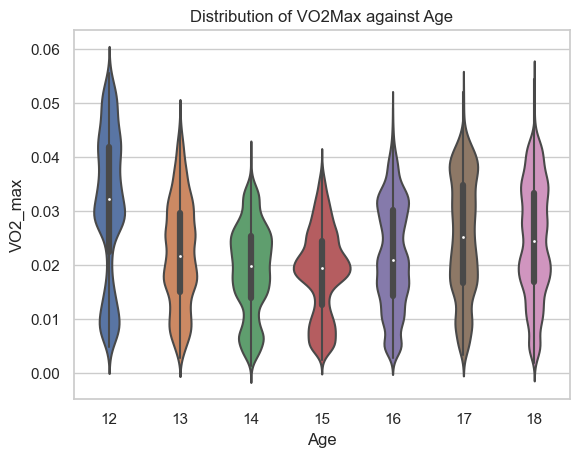

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# open sheet "Athletes" from source file
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')
df=pd.read_excel(xls,'Athletes')

# read combined sport data file
df_combined_data=pd.read_excel('combined_sports_data.xlsx')
# merge the two data based on ID
df_merge_file=df.merge(df_combined_data,on='ID',how='inner')

#df_merge_file['VO2_total']=df_merge_file['VO2'].sum()
#print(df_merge_file)

df_merge_file['VO2max']=df_merge_file['VO2']/df_merge_file['Weight']
#df_merge_file.to_excel('temp2.xlsx')
# set the violin figure size
#plt.figure(figsize=(10, 8))

#set the grid style
sns.set(style="whitegrid")

#set parameters for violin plot
sns.violinplot(x='age', y='VO2max', data=df_merge_file)

# Set the title and labels
plt.title('Distribution of VO2Max against Age')
plt.xlabel('Age')
plt.ylabel('VO2_max')

# Display the plot
plt.show()

# 78  Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

Analysis: In question 71,I used'loc' function to define HRzones. For this analysis, I have defined a function to create HRzones. and create a heat map by using number of athletes and HRzones. Each athlete can be present in all the zones,so number of athletes can be calculated based on their 'ID'.

ID  HRzone                    
1   zone 5 (anaerobic)            1266
    zone 4 (lactate threshold)     611
    zone 3 (tempo)                 215
    zone 1 (recovery/easy)         195
    zone 2 (aerobic/base)          116
                                  ... 
18  zone 5 (anaerobic)            1089
    zone 3 (tempo)                 657
    zone 4 (lactate threshold)     464
    zone 1 (recovery/easy)         221
    zone 2 (aerobic/base)          140
Name: HRzone, Length: 90, dtype: int64


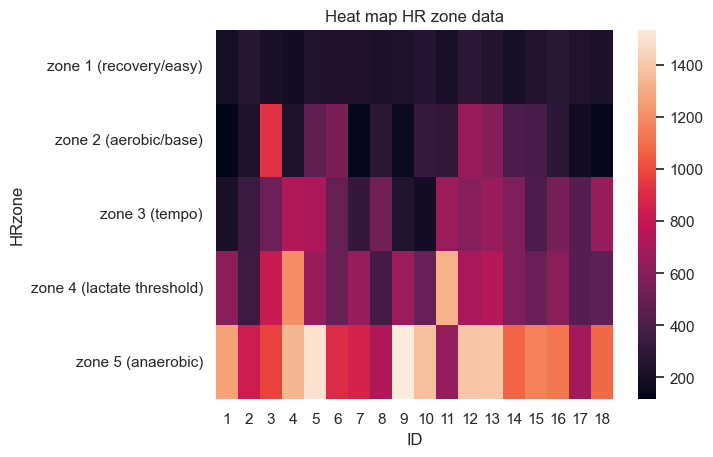

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_combined_data=pd.read_excel("combined_sports_data.xlsx")

df_combined_data['HR']=60/(df_combined_data['RR']/1000)

#df_combined_data.head()

def HR_zone(HR):
    if HR<100:
        return 'zone 1 (recovery/easy)'
    elif HR>=100 and HR<120:
        return 'zone 2 (aerobic/base)'
    elif HR>=120 and HR<135:
        return 'zone 3 (tempo)'
    elif HR>=135 and HR<155:
        return'zone 4 (lactate threshold)'
    elif HR>=155:
        return 'zone 5 (anaerobic)'
    
df_combined_data['HRzone'] =  df_combined_data['HR'].apply(HR_zone)
#print(df_combined_data['HRzone'])
#HRzone_in_minutes= df_combined_data['HRzone']/60


count_athletes=df_combined_data.groupby('ID')['HRzone'].value_counts()
#counts_ath = df_combined_data['HRzone'].value_counts().reindex(['zone 1 (recovery/easy)', 'zone 2 (aerobic/base', 'zone 3 (tempo)', 'zone 4 (lactate threshold)', 'zone 5 (anaerobic'])
#counts_ath_df = pd.DataFrame(counts_ath).transpose()
#print("\ncounts=",counts_ath_df)

#count_athletes=df_combined_data.groupby('ID')['HRzone'].nunique()
#count_athletes=df_combined_data.groupby('ID')['HRzone'].sum()
print(count_athletes)
df_HR_ID=df_combined_data.groupby(['HRzone','ID']).size().reset_index(name='count_athletes')


df_heat_map=df_HR_ID.pivot('HRzone','ID','count_athletes')
hm=sns.heatmap(df_heat_map)
plt.title("Heat map HR zone data")
plt.show()

# 79  Plot the Donut chart athlete distrubution by Gender

Female    10
Male       8
Name: Gender, dtype: int64


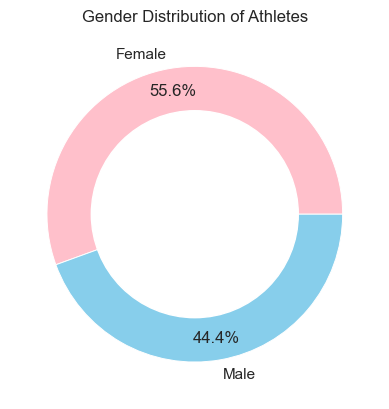

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

#open source file
xls = pd.ExcelFile('./resources/V02Max_Combined.xlsx')

# read sheet 'Atheletes'
df=pd.read_excel(xls,'Athletes')

#get counts from Gender column
gender_counts = df['Gender'].value_counts()
print(gender_counts)

#define colors
colors = ['pink', 'skyblue']

#define parameters for pie chart
plt.pie(gender_counts,colors=colors, labels=gender_counts.index,
        autopct='%1.1f%%', pctdistance=0.85,wedgeprops= { 'linewidth' : 0.7, 'edgecolor' : 'white' })

#define parameters for circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

#adding circle into pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#adding title
plt.title('Gender Distribution of Athletes')
plt.show()

# 80 Find the size of a tuple for a given input

In [203]:
#get the input values
data = input("\nEnter any values seperated by commas")

#split the data
tup_list = data.split(",")
result = tuple(tup_list)
print("\nTuple:", result)

#print the size
size = len(result)
print("\nSize of the tuple:", size)


Enter any values seperated by commasa,b,c

Tuple: ('a', 'b', 'c')

Size of the tuple: 3
